## 1. Understand the problem

**Dataset:** IMDB Dataset of 50K Movie Reviews<br>
**Download:** https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
<br>**From the dataset description:**
- There are 50,000 rows of reviews.
- 25,000 of them are positive reviews and the other 25,000 reviews are negative.
- There are 2 columns, review and sentiment.
- **Our task** is to predict the given reviews as they are positive or negative. 

## 2. Import necessary libraries and dataset

In [1]:
# Initialize

import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import Dataset

df_raw = pd.read_csv('IMDB Dataset.csv')
df = df_raw.copy(deep = True)

df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## 3. Data reprocessing
This step includes:<br>
3.1) Handle missing data<br>
3.2) Text preprocessing<br>
3.3) Encode and tokenize data
### 3.1) Check missing data

In [32]:
def missing_data(df):
        total = df.isnull().sum().sort_values(ascending=False)
        percent_1 = df.isnull().sum()/df.isnull().count()*100
        percent_2 = (round(percent_1,1)).sort_values(ascending=False)
        percent_3 = df.count()
        missing_table = pd.concat([total,percent_2,percent_3],axis=1,keys=['Null','%','Count'])
        return(missing_table)
        

display(pd.concat([missing_data(df),pd.concat([df.dtypes,df.nunique()],axis = 1,keys = ['Type','Unique'])],axis = 1))

,Null,%,Count,Type,Unique
review,0,0.0,50000,object,49582
sentiment,0,0.0,50000,object,2
text_cleaned,0,0.0,50000,object,49578


### 3.2 Define function for text preprocessing

In [4]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
        # remove numbers
        text_nonum = re.sub(r'\d+','',text)
        # remove html
        text_nohtml = re.sub(r'<.*?>', '', text_nonum)
        # remove punctuations
        text_nopunc = re.sub(r'[^\w\s]', '', text_nohtml)
        # convert characters to lower case
        text_lower = text_nopunc.lower()
        # substitute multiple whitespace with single whitespace
        text_no_doublespace =re.sub('\s+',' ',text_lower).strip()
        # remove stopwords
        text_nostopword = ' '.join([word for word in text_no_doublespace.split() if word not in stop_words])
        
        return text_nostopword

In [5]:
print('--------------BEFORE--------------')
print(df.iloc[1].review)
print('--------------AFTER--------------')
print(clean_text(df.iloc[1].review))

--------------BEFORE--------------
A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every

We could see that html tags are gone

In [6]:
# now apply to whole dataframe

df['text_cleaned'] = df['review'].apply(clean_text)
df.head()

,review,sentiment,text_cleaned
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


### 3.3) Encode and tokenize data
1. To encode and tokenize the **reviews**, we use a pre-trained matrix called *GloVe (Global Vectors for Word Representation)* for word embedding.<br>**Download GloVe:** https://www.kaggle.com/datasets/rtatman/glove-global-vectors-for-word-representation
2. To encode the **sentiment**, we use *label encoder*.


In [7]:
# Tokenize

from tensorflow.keras.preprocessing.text import Tokenizer

X = df['text_cleaned']
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(X)

X_token = tokenizer.texts_to_sequences(X)

In [33]:
print('--------------BEFORE--------------')
print(X[1])
print('--------------AFTER--------------')
print(X_token[1])

--------------BEFORE--------------
wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done
--------------AFTER--------------
[276, 39, 250, 1219, 2838, 1, 1, 1485, 282, 1, 403, 1, 177, 1730, 309, 298, 61, 430, 14, 2109, 384, 4456, 89, 1, 2061, 3132, 246, 11, 1, 670, 9770, 1643, 1529, 7132, 6339, 14, 166, 57, 1, 318, 2206, 298, 4138, 250, 4, 16, 3013, 116, 43, 1730, 10, 158, 237, 39, 84, 939, 2817

In [10]:
# TTo see how the tokenizer work, we decode the tokenization

word_index = tokenizer.word_index
reverse_word_index = {v: k for k, v in word_index.items()}
print('number of vocab = ', len(word_index))

# print top 5 most frequent tokens (index and value)
count = 0
for key, value in reverse_word_index.items():
    print(key, value)
    count += 1
    if count == 5:
        break

number of vocab =  214767
1 <UNK>
2 movie
3 film
4 one
5 like


In [11]:
# create embedding with GloVe

embeddings_index = {}
with open('../Resources/glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    
num_words = len(word_index) + 1
embedding_dim = 100 # same as GloVe dimension
embedding_matrix = np.zeros((num_words, embedding_dim)) # if no vocab found in GloVe -> fill with 0
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [34]:
print('size of embedding_matrix = ', embedding_matrix.shape)
print(embedding_matrix)

size of embedding_matrix =  (214768, 100)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.38251001 0.14821    0.60601002 ... 0.058921   0.091112   0.47283   ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


Now we have matrix with 214767+1 members(vocab), each member is a 100-dimensional GloVe vector

In [37]:
# padding to make all sequence's length = 100

from tensorflow.keras.preprocessing.sequence import pad_sequences

X_sequences = pad_sequences(X_token, padding='post', maxlen=100)
print('size of X_sequences = ', X_sequences.shape)

size of X_sequences =  (50000, 100)


In [44]:
print('--------------BEFORE--------------')
print(X_token[1])
print('len = ', len(X_token[1]))
print('--------------AFTER--------------')
print(X_sequences[1])
print('len = ', len(X_sequences[1]))

--------------BEFORE--------------
[276, 39, 250, 1219, 2838, 1, 1, 1485, 282, 1, 403, 1, 177, 1730, 309, 298, 61, 430, 14, 2109, 384, 4456, 89, 1, 2061, 3132, 246, 11, 1, 670, 9770, 1643, 1529, 7132, 6339, 14, 166, 57, 1, 318, 2206, 298, 4138, 250, 4, 16, 3013, 116, 43, 1730, 10, 158, 237, 39, 84, 939, 2817, 143, 235, 1986, 895, 2970, 1102, 1015, 4787, 185, 1645, 4352, 452, 51, 3400, 1, 1, 589, 452, 965, 1, 1, 1, 75, 2106, 1752, 14, 126]
len =  84
--------------AFTER--------------
[ 276   39  250 1219 2838    1    1 1485  282    1  403    1  177 1730
  309  298   61  430   14 2109  384 4456   89    1 2061 3132  246   11
    1  670 9770 1643 1529 7132 6339   14  166   57    1  318 2206  298
 4138  250    4   16 3013  116   43 1730   10  158  237   39   84  939
 2817  143  235 1986  895 2970 1102 1015 4787  185 1645 4352  452   51
 3400    1    1  589  452  965    1    1    1   75 2106 1752   14  126
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
len 

All reviews are encoded into sequences of 100 numbers

In [14]:
# preprocessing: encode target and split

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()

y = df['sentiment']
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_sequences, y, stratify=y,  test_size=0.2, random_state=42)
print('shape of X_train = ', X_train.shape)

shape of X_train =  (40000, 100)


In [15]:
# prepare function for history plotting

def plot_history(history):
  # Create subplots
  fig, axs = plt.subplots(1, 2, figsize=(10, 5))

  # Plot the accuracy history
  axs[0].plot(history.history['accuracy'])
  axs[0].plot(history.history['val_accuracy'])
  axs[0].set_title('Model accuracy')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylim([0, 1])
  axs[0].legend(['Train', 'Test'], loc='upper left')

  # Plot the loss history
  axs[1].plot(history.history['loss'])
  axs[1].plot(history.history['val_loss'])
  axs[1].set_title('Model loss')
  axs[1].set_ylabel('Loss')
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylim([0, 1])
  axs[1].legend(['Train', 'Test'], loc='upper left')

  plt.show()
# plot_history(history1)

## 4. Model data
We will start from a small and simple GRU model, and adjust the parameters to find the optimal one.

In [16]:
# import libraries for modeling

from keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Bidirectional
from keras.layers.core import Dense, Activation, Dropout

In [17]:
# define early stopping trigger

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0.001,# minimium amount of change to count as an improvement
                               patience=5,# how many epochs to wait before stopping
                               restore_best_weights=True)

In [18]:
# let try the first model: GRU

model1 = Sequential()
model1.add(Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=embedding_dim, trainable=False))
model1.add(GRU(128, return_sequences=True))
model1.add(GRU(128))
model1.add(Dense(1, activation='sigmoid'))

# Compile the model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          21476800  
_________________________________________________________________
gru (GRU)                    (None, 100, 128)          88320     
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               99072     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 21,664,321
Trainable params: 187,521
Non-trainable params: 21,476,800
_________________________________________________________________


In [19]:
history1 = model1.fit(X_train, y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping], shuffle=False)

Epoch 1/30
1000/1000 [==============================] - 22s 15ms/step - loss: 0.5158 - accuracy: 0.7195 - val_loss: 0.4052 - val_accuracy: 0.8119
Epoch 2/30
1000/1000 [==============================] - 14s 14ms/step - loss: 0.3564 - accuracy: 0.8418 - val_loss: 0.3534 - val_accuracy: 0.8424
Epoch 3/30
1000/1000 [==============================] - 14s 14ms/step - loss: 0.3242 - accuracy: 0.8607 - val_loss: 0.3366 - val_accuracy: 0.8491
Epoch 4/30
1000/1000 [==============================] - 14s 14ms/step - loss: 0.2982 - accuracy: 0.8742 - val_loss: 0.3311 - val_accuracy: 0.8524
Epoch 5/30
1000/1000 [==============================] - 14s 14ms/step - loss: 0.2714 - accuracy: 0.8887 - val_loss: 0.3236 - val_accuracy: 0.8577
Epoch 6/30
1000/1000 [==============================] - 14s 14ms/step - loss: 0.2389 - accuracy: 0.9041 - val_loss: 0.3299 - val_accuracy: 0.8562
Epoch 7/30
1000/1000 [==============================] - 14s 14ms/step - loss: 0.2013 - accuracy: 0.9233 - val_loss: 0.3542 -

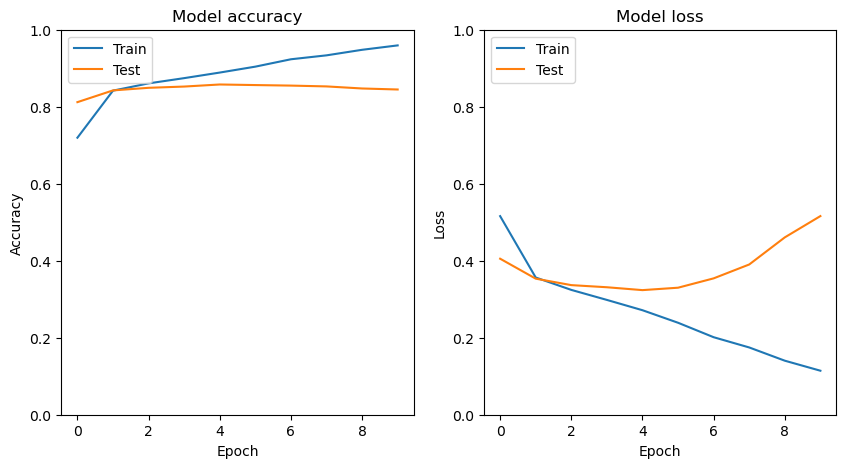

In [20]:
plot_history(history1)

From the plot of loss, we could see that model tends to overfit.<br>
Let's try to reduce model complexity and use the dropout layer.

In [21]:
# 2nd model: simpler + dropout

model2 = Sequential()
model2.add(Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=embedding_dim, trainable=False))
model2.add(GRU(64, return_sequences=True))
model2.add(Dropout(0.5))
model2.add(GRU(16))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          21476800  
_________________________________________________________________
gru_2 (GRU)                  (None, 100, 64)           31872     
_________________________________________________________________
dropout (Dropout)            (None, 100, 64)           0         
_________________________________________________________________
gru_3 (GRU)                  (None, 16)                3936      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 21,512,625
Trainable params: 35,825
Non-trainable params: 21,476,800
_____________________________________

In [22]:
# 2nd try: dropout & early_stopping & simpler NN
history2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping], shuffle=False)

Epoch 1/30
1000/1000 [==============================] - 17s 14ms/step - loss: 0.5422 - accuracy: 0.7190 - val_loss: 0.3951 - val_accuracy: 0.8239
Epoch 2/30
1000/1000 [==============================] - 14s 14ms/step - loss: 0.3795 - accuracy: 0.8401 - val_loss: 0.3462 - val_accuracy: 0.8443
Epoch 3/30
1000/1000 [==============================] - 14s 14ms/step - loss: 0.3440 - accuracy: 0.8574 - val_loss: 0.3328 - val_accuracy: 0.8551
Epoch 4/30
1000/1000 [==============================] - 14s 14ms/step - loss: 0.3211 - accuracy: 0.8688 - val_loss: 0.3142 - val_accuracy: 0.8631
Epoch 5/30
1000/1000 [==============================] - 14s 14ms/step - loss: 0.3022 - accuracy: 0.8792 - val_loss: 0.3195 - val_accuracy: 0.8645
Epoch 6/30
1000/1000 [==============================] - 15s 15ms/step - loss: 0.2814 - accuracy: 0.8901 - val_loss: 0.3146 - val_accuracy: 0.8694
Epoch 7/30
1000/1000 [==============================] - 15s 15ms/step - loss: 0.2571 - accuracy: 0.9008 - val_loss: 0.3190 -

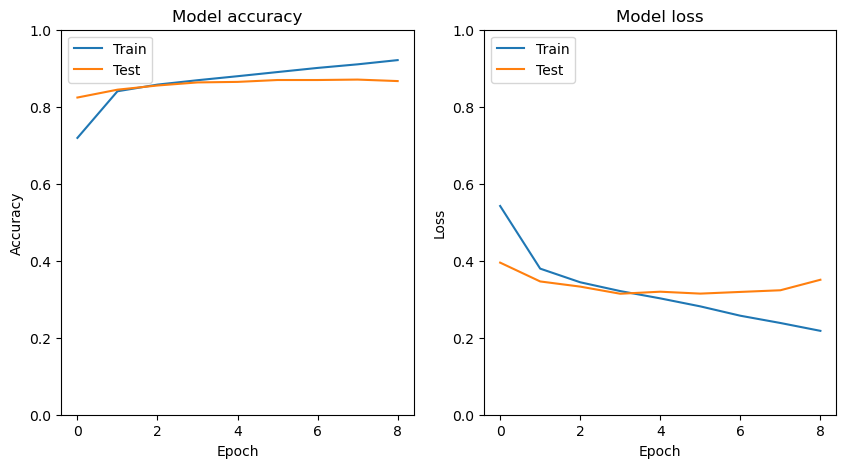

In [23]:
plot_history(history2)

The overfitting still exists but less than the first model.<br>
This time, we will use *kernel_regularizer*.

In [24]:
# try bigger model w/ GRU+dropout+regularizers
from tensorflow.keras import regularizers

model3 = Sequential()
model3.add(Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=embedding_dim, trainable=False))
model3.add(GRU(64, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model3.add(Dropout(0.5))
model3.add(GRU(32))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))

# Compile the model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          21476800  
_________________________________________________________________
gru_4 (GRU)                  (None, 100, 64)           31872     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
gru_5 (GRU)                  (None, 32)                9408      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 21,518,113
Trainable params: 41,313
Non-trainable params: 21,476,800
_____________________________________

In [25]:
# 4th try: dropout & early_stopping & medium NN 
history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping], shuffle=False)

Epoch 1/30
1000/1000 [==============================] - 18s 16ms/step - loss: 0.7900 - accuracy: 0.5510 - val_loss: 0.6417 - val_accuracy: 0.6874
Epoch 2/30
1000/1000 [==============================] - 15s 15ms/step - loss: 0.7101 - accuracy: 0.5322 - val_loss: 0.6781 - val_accuracy: 0.6089
Epoch 3/30
1000/1000 [==============================] - 15s 15ms/step - loss: 0.5881 - accuracy: 0.7134 - val_loss: 0.4491 - val_accuracy: 0.8140
Epoch 4/30
1000/1000 [==============================] - 15s 15ms/step - loss: 0.4498 - accuracy: 0.8184 - val_loss: 0.4218 - val_accuracy: 0.8224
Epoch 5/30
1000/1000 [==============================] - 15s 15ms/step - loss: 0.4270 - accuracy: 0.8288 - val_loss: 0.4048 - val_accuracy: 0.8357
Epoch 6/30
1000/1000 [==============================] - 16s 16ms/step - loss: 0.4194 - accuracy: 0.8315 - val_loss: 0.3980 - val_accuracy: 0.8347
Epoch 7/30
1000/1000 [==============================] - 14s 14ms/step - loss: 0.4118 - accuracy: 0.8361 - val_loss: 0.3981 -

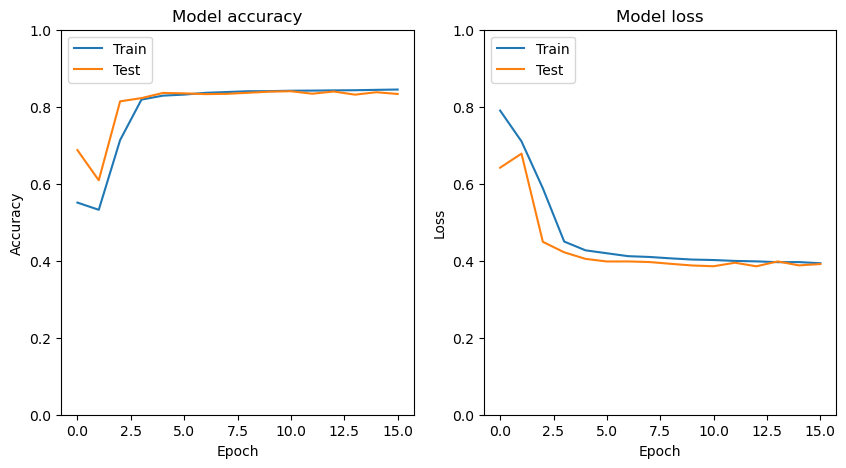

In [26]:
plot_history(history3)

The overfitting in model 1 and 2 is cleary reduced.
## 5. Model evaluation
Plot and compare all histories.

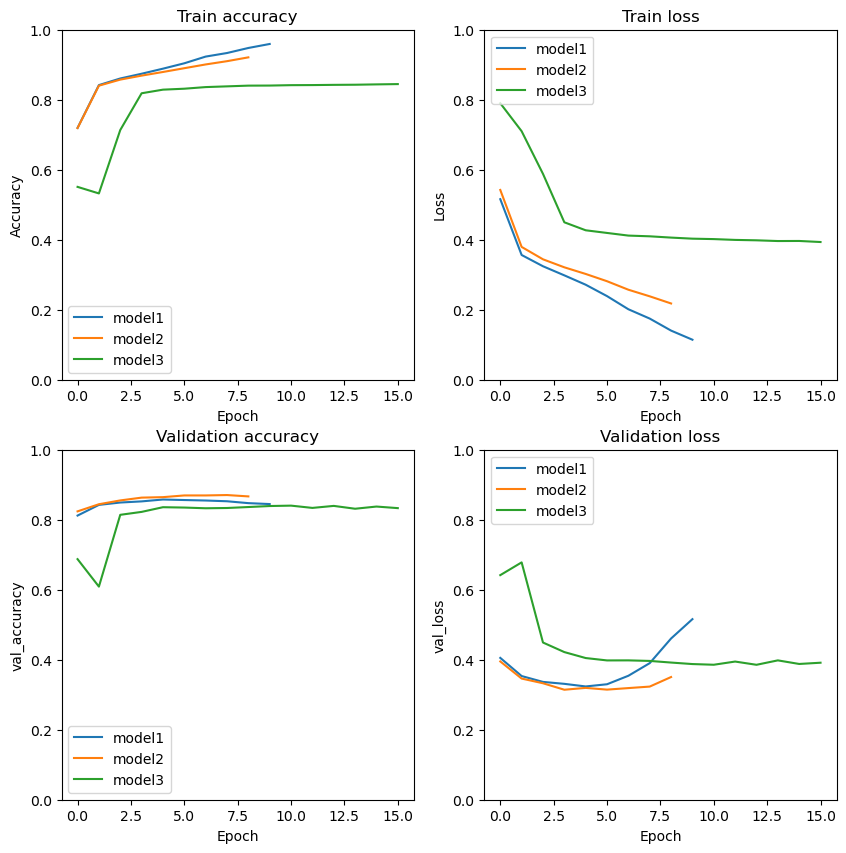

In [27]:
# compare 3 models

def compare_history(histories, labels):
  # Extract the accuracy and loss histories for each model
  acc_histories = []
  loss_histories = []
  val_acc_histories = []
  val_loss_histories = []
  for history in histories:
    acc_histories.append(history.history['accuracy'])
    loss_histories.append(history.history['loss'])
    val_acc_histories.append(history.history['val_accuracy'])
    val_loss_histories.append(history.history['val_loss'])

  # Create subplots
  fig, axs = plt.subplots(2, 2, figsize=(10, 10))

  # Plot the accuracy histories
  for acc_history, label in zip(acc_histories, labels):
    axs[0][0].plot(acc_history, label=label)
  axs[0][0].set_title('Train accuracy')
  axs[0][0].set_ylabel('Accuracy')
  axs[0][0].set_xlabel('Epoch')
  axs[0][0].legend(loc='lower left')
  axs[0][0].set_ylim([0, 1])

  # Plot the loss histories
  for loss_history, label in zip(loss_histories, labels):
    axs[0][1].plot(loss_history, label=label)
  axs[0][1].set_title('Train loss')
  axs[0][1].set_ylabel('Loss')
  axs[0][1].set_xlabel('Epoch')
  axs[0][1].legend(loc='upper left')
  axs[0][1].set_ylim([0, 1])

  # Plot the validation accuracy histories
  for val_acc_history, label in zip(val_acc_histories, labels):
    axs[1][0].plot(val_acc_history, label=label)
  axs[1][0].set_title('Validation accuracy')
  axs[1][0].set_ylabel('val_accuracy')
  axs[1][0].set_xlabel('Epoch')
  axs[1][0].legend(loc='lower left')
  axs[1][0].set_ylim([0, 1])

# Plot the validation loss histories
  for val_loss_history, label in zip(val_loss_histories, labels):
    axs[1][1].plot(val_loss_history, label=label)
  axs[1][1].set_title('Validation loss')
  axs[1][1].set_ylabel('val_loss')
  axs[1][1].set_xlabel('Epoch')
  axs[1][1].legend(loc='upper left')
  axs[1][1].set_ylim([0, 1])

  plt.show()
histories = [history1, history2, history3]
labels = ['model1', 'model2', 'model3']
compare_history(histories, labels)

In [28]:
def test_models(models, x_test, y_test):
    scores = {}
    for model in models:
        score = model.evaluate(x_test, y_test, verbose=0)
        scores[model.name] = score
    return scores


models = [model1, model2, model3]


scores = test_models(models, X_test, y_test)

for model_name, score in scores.items():
    print(f"{model_name} : {score}")


sequential : [0.3224838376045227, 0.8585000038146973]
sequential_1 : [0.3123195767402649, 0.864300012588501]
sequential_2 : [0.38359931111335754, 0.8443999886512756]


In [29]:
# model 3 is the best performer here (low loss&high accuracy)

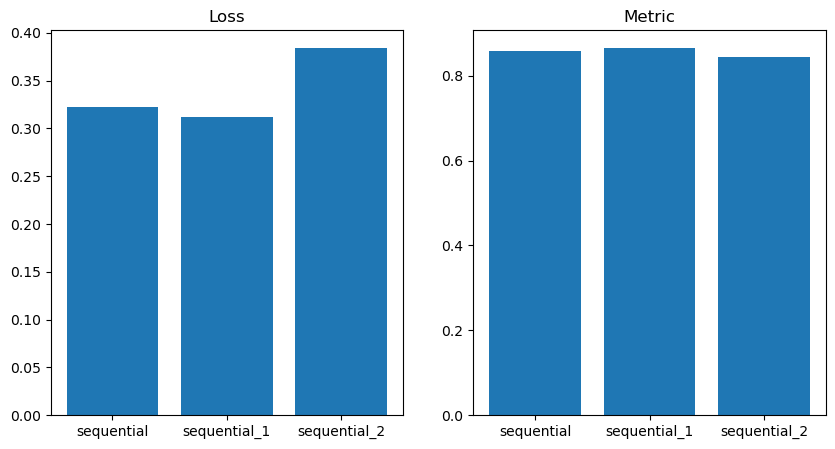

In [30]:
loss_values = [scores[key][0] for key in scores]
metric_values = [scores[key][1] for key in scores]

# create the bar chart
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(scores.keys(), loss_values)
axs[0].set_title('Loss')
axs[1].bar(scores.keys(), metric_values)
axs[1].set_title('Metric')
plt.show()

## Summary
**Model1**: wide model<br>
**Model2**: small model + dropout<br>
**Model3**: medium model + regularization + dropout<br>

1. **Model 1** gives good accuracy but it tends to suffer from overfitting after a few epochs of training.
2. **Model 3** using regularization tend to be robust to overfitting compare to **model 2** and **1**. However, the trade-off is obviously low accuracy.
3. **Model 2** is the most balanced one when compared to **model 1** and **3**.


Model 2 with an accuracy of around 86% is the best performer but only slightly better than model 1 (85%).<br>
